## Imports

In [14]:
import scipy.io, random
import numpy as np
from utils import *
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Forecasting

In [2]:
def plot_forecast(source, prediction, nrow=5, ncol=5, from_=2800, to_=None):
    n = source.shape[0]
    idx = random.sample(range(n), nrow * ncol)
    fig, axs = plt.subplots(nrow, ncol, figsize=(15,8), sharex=True)
    if to_ is None:
        to_ = source.shape[1]
    i = 0
    for r in range(nrow):
        for c in range(ncol):
            axs[r,c].plot(prediction[idx[i], from_:to_], c='r')
            axs[r,c].plot(source[idx[i], from_:to_], c='b')

            i += 1
    fig.tight_layout()
    plt.show()

In [3]:
def plot_shape_function(d, F1, F2, nrow=5, ncol=5):
    n = F1.shape[1]
    idx = random.sample(range(n), nrow * ncol)
    fig, axs = plt.subplots(nrow, ncol, figsize=(15,8), sharex=True)
    i = 0
    for r in range(nrow):
        for c in range(ncol):
            if F2 is not None:
                axs[r,c].scatter(d, F1[:, idx[i]], c='b')
                axs[r,c].scatter(d, F2[:, idx[i]], c='r')
            else:
                axs[r,c].scatter(d, F1[:, idx[i]])
            i += 1
    fig.tight_layout()
    plt.show()

In [4]:
# Colors
# size = out[2].shape[1]
# colors = list(mcolors.CSS4_COLORS.keys())
# indices = random.choices(range(len(colors)), k=size)

In [110]:
def scale(X, max_, min_):
    X_std = (X - X.min(axis=1).reshape(-1,1)) / ((X.max(axis=1) - X.min(axis=1)).reshape(-1,1))
    X_std = X_std * (max_ - min_) + min_
    return X_std

## Learning

In [33]:
X = np.load('data/data.npy')

In [125]:
sim = load_pickle('output/mine.pickle')

In [126]:
sim[2] = sim[2].detach().numpy()
sim[0].shape, sim[1].shape, sim[2].shape

((30, 7320), (30, 7320), (900, 1))

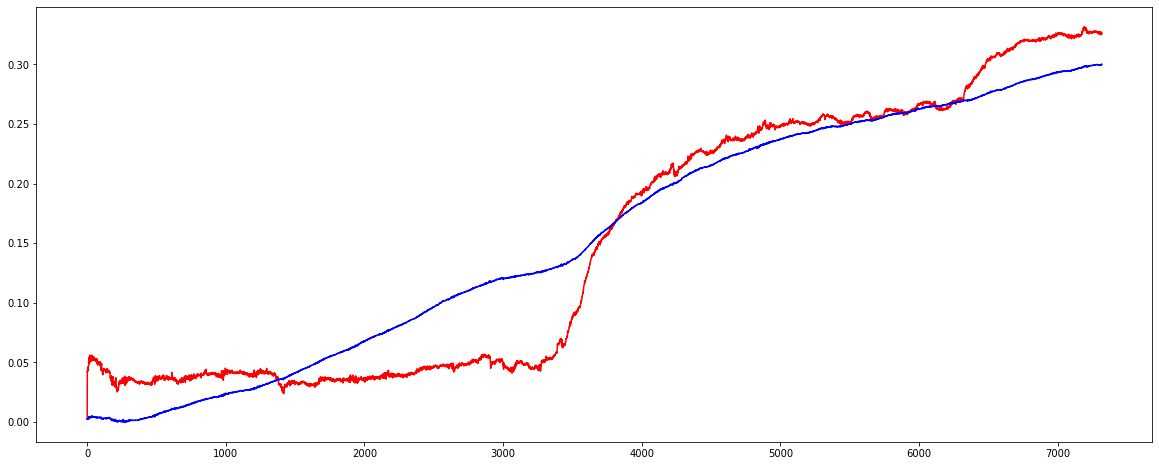

In [127]:
plt.figure(figsize=(20,8))
plt.plot(sim[1][10, :], c='r')
plt.plot(sim[0][10, :], c='b')

plt.show()

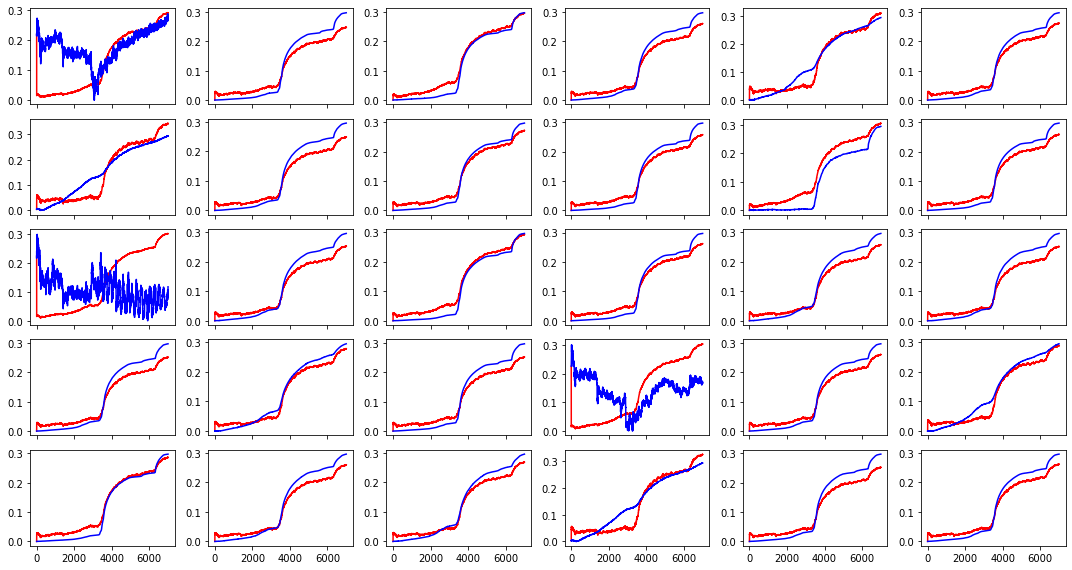

In [128]:
plot_forecast(sim[0], sim[1], 5, 6, 0, 7000)

## Simulation

In [129]:
_, d, _ = load_pickle('data/sample.pickle')

In [130]:
d_norm = scale(d.reshape(1,-1), 0.3, 0).reshape(-1)

In [11]:
F =  1e-2 * np.log(norm_d+1)

In [123]:
d_norm.shape, sim[2].shape

((900,), (900, 1))

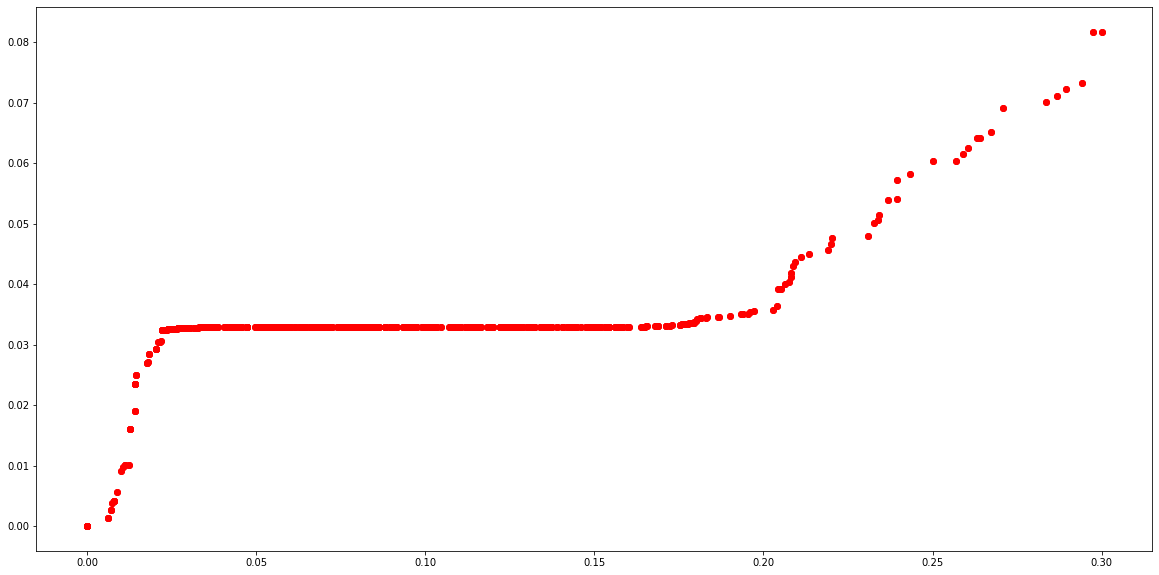

In [132]:
l = 0
plt.figure(figsize=(20,10))
# plt.scatter(d[:150], F[:150, l], c='b')
plt.scatter(d_norm[:], sim[2][:, l], c='r')
plt.show()

In [ ]:
plot_shape_function(d_norm, sim[2], None, 5, 5)

## Weight dynamics

In [ ]:
def plot_weights(f, N, name):
    fd = f.reshape((N, N))
    fd = np.exp(-fd)
    plt.figure(figsize=(8, 8))
    plt.imshow(fd, cmap="YlGn")
    plt.title(name)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
    plt.savefig(f'viz/weight/{name}.png')

In [ ]:
F = np.load('data/estimates.npy')
NN, T = F.shape
N = np.sqrt(NN).astype('int')

In [ ]:
for t in range(0, T, 200):
    f = F[:, t]
    plot_weights(f, N, f"T{t}")